This project is my first dedicated to deep learning and made with TensorFlow Keras API.

I used famous "THE MNIST DATABASE of handwritten digits", however taken from https://pjreddie.com/projects/mnist-in-csv/
because of easy to use .csv format and not .gz that is here: http://yann.lecun.com/exdb/mnist/

This is an image recognition task.

The project is based on usage of neural networks.

I used Convolution, Maxpooling, One-Hot encoder, ImageDataGenerator. 

As it is the things I understand the most. 

## Importing needed libraries

In [1]:
#Importing needed libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix

## Importing and checking data

In [2]:
#Import test and trainig data sets
test = pd.read_csv('mnist_test.csv')
training = pd.read_csv('mnist_train.csv')

In [3]:
#See the specific info about data sets. 
test.info()
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [4]:
#See how the data looks
training.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data preparation

In [5]:
#Separating images as X and labels as Y
X_train = training.drop(['label'], axis = 1)
Y_train = training['label']

#Test images 
X_test = test.drop(['label'], axis = 1)
Y_test = test['label']

C:\Users\kacpe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

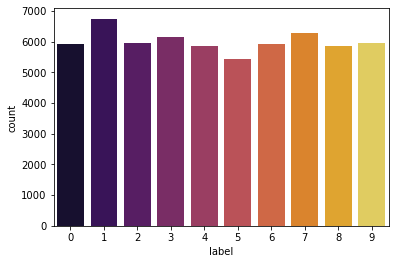

In [6]:
# All digits are distributed in similar number in train set. 
sns.countplot(Y_train, palette = 'inferno')

C:\Users\kacpe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

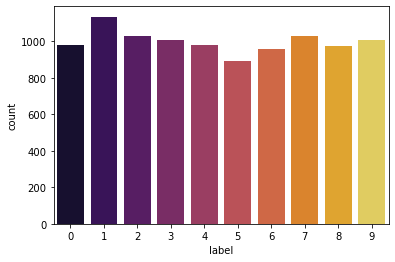

In [7]:
#As with train set, all digits are distributed similarly. 
sns.countplot(Y_test, palette = 'inferno')

In [8]:
#One-hot encoding the labels. 
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [9]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [10]:
# I've created simple function to visualize an image with given index. 
def visualize_image(X_train, Y_train,index = 0):
    #index is a image you want to visualize
    
    # Visualize the image
    plt.imshow(X_train[index], cmap = 'inferno')

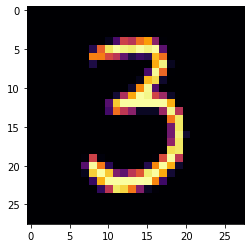

In [11]:
visualize_image(X_train, Y_test, 50)

In [12]:
#normalize images
X_train = X_train/255.0
X_test = X_test/255.0

# Creating the model

In [13]:
#Now create the easy Sequential model that will learn and predict later in this file
model = keras.models.Sequential()

#First layer of convolution and MaxPooling
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

#Second layer of convolution and MaxPooling
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

#Ending our model with Flatten layer and Dense, ending with Dense with 10 output space as we have 10 categories
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                    

## Compiling the model

In [14]:
#https://keras.io/api/optimizers/rmsprop/
optimizer = RMSprop(learning_rate = 0.003, rho = 0.9, momentum = 0.0, epsilon = 1e-07)

model.compile(optimizer = optimizer, 
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [15]:
batch = 128

In [16]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.001)

## Fitting the model

To use fit and evaluate model delete "#" below. 

In [17]:
#model.fit(X_train,Y_train, epochs = 10, batch_size = batch)

In [18]:
#model.evaluate(X_test, Y_test)

Wihout augmentation the accuracy I obtained was 99.34%.

# Data Augmentation

In [19]:
datagen = ImageDataGenerator(
    rotation_range = 0.1, #randomly rotate image by 0.1
    zoom_range = 0.1, #randomly zoom image by 0.1
    width_shift_range = 0.1, #randomly shift images horizontally
    height_shift_range = 0.1, #randomly shift images vertically 
    horizontal_flip = False, #randomly flip images
    vertical_flip = False, #randomly flip images
)

datagen.fit(X_train)

In [20]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size = batch),
                          epochs = 15, validation_data = (X_test, Y_test), verbose = 2, callbacks = reduce_lr
                   )


Epoch 1/15
469/469 - 151s - loss: 0.3154 - accuracy: 0.9020 - val_loss: 0.0315 - val_accuracy: 0.9897 - lr: 0.0030 - 151s/epoch - 321ms/step
Epoch 2/15
469/469 - 130s - loss: 0.0678 - accuracy: 0.9800 - val_loss: 0.0371 - val_accuracy: 0.9895 - lr: 0.0030 - 130s/epoch - 276ms/step
Epoch 3/15
469/469 - 125s - loss: 0.0534 - accuracy: 0.9835 - val_loss: 0.0329 - val_accuracy: 0.9923 - lr: 0.0030 - 125s/epoch - 267ms/step
Epoch 4/15
469/469 - 111s - loss: 0.0280 - accuracy: 0.9918 - val_loss: 0.0195 - val_accuracy: 0.9937 - lr: 0.0010 - 111s/epoch - 238ms/step
Epoch 5/15
469/469 - 106s - loss: 0.0253 - accuracy: 0.9928 - val_loss: 0.0172 - val_accuracy: 0.9945 - lr: 0.0010 - 106s/epoch - 227ms/step
Epoch 6/15
469/469 - 114s - loss: 0.0230 - accuracy: 0.9936 - val_loss: 0.0164 - val_accuracy: 0.9943 - lr: 0.0010 - 114s/epoch - 244ms/step
Epoch 7/15
469/469 - 110s - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0185 - val_accuracy: 0.9943 - lr: 0.0010 - 110s/epoch - 234ms/step
Epoch 8/15
46

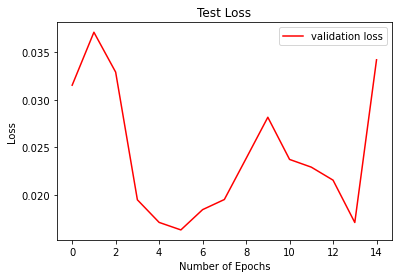

In [21]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='r', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

After data augmentation by ImageDataGenerator it seems that accuracy of the model is aroud 99.5%. 

313/313 [==============================] - 5s 16ms/step


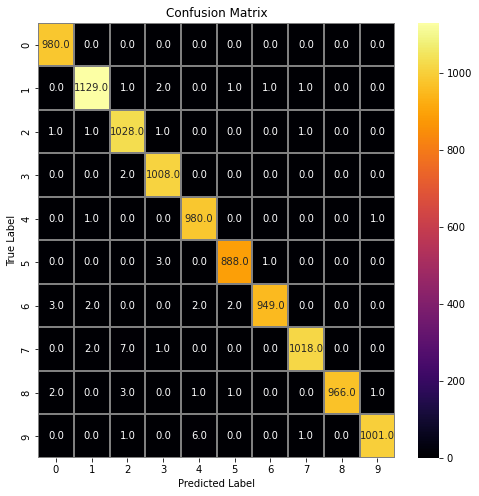

In [22]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="inferno",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()